In [18]:
import glob
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [19]:
# read in all the jason files under a directory as a list of dataframes
def read_json_files_as_df_list(path):
    cwd = os.getcwd()
    #combine cwd and path
    path = os.path.join(cwd, path)
    os.chdir(path)
    df_list = []
    for file in glob.glob("*.json"):
        df = pd.read_json(file, lines=True)
        df_list.append(df)
    os.chdir(cwd)
    return df_list

In [20]:
data=read_json_files_as_df_list('yelp-dataset/yelp_training_set')
business_df = data[0]
checkin_df = data[1]
review_df = data[2]
user_df = data[3]




In [21]:
#save a dataframe as a csv file
def save_df_as_csv(df, path):
    cwd = os.getcwd()
    #combine cwd and path
    path = os.path.join(cwd, path)
    df.to_csv(path, index=False)

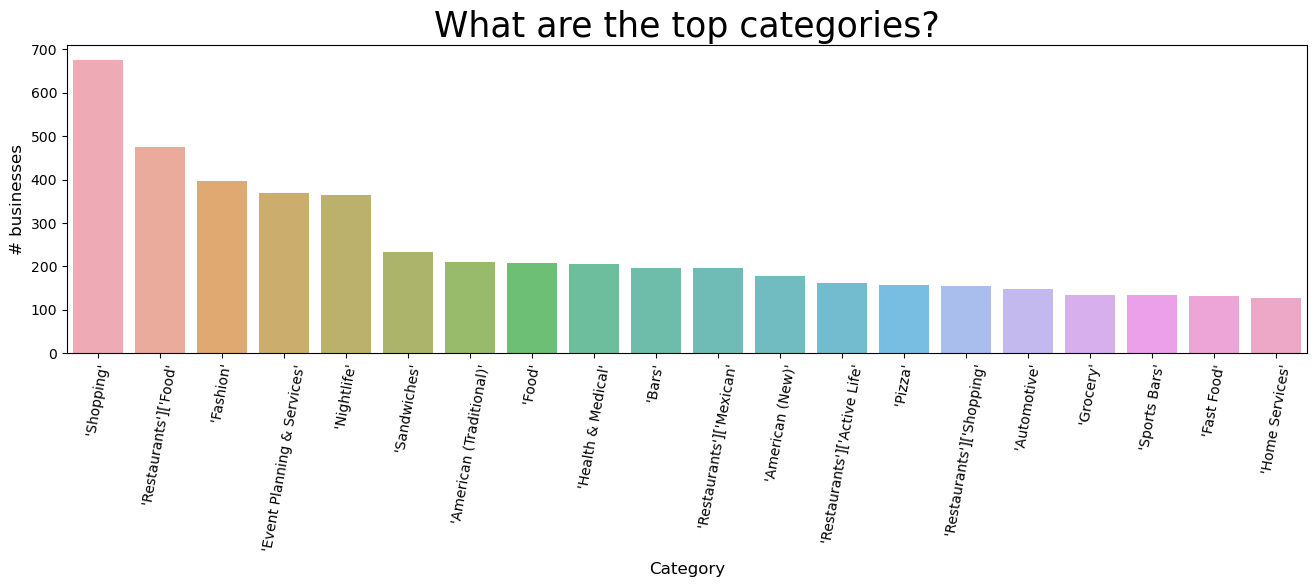

In [43]:
business_cats = ''.join(business_df['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

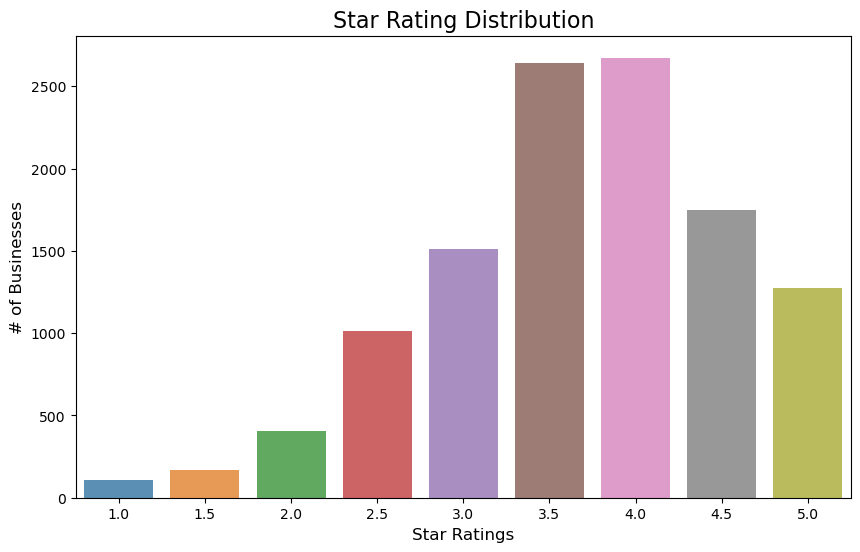

In [39]:
plt.figure(figsize=(10, 6))  # Adjusting figure size to match the earlier histogram
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)  # Using barplot for categorical data
plt.title("Star Rating Distribution", fontsize=16)
plt.ylabel('# of Businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)
plt.xticks(rotation=0)  # Ensuring the x-axis labels are horizontal for readability
plt.show()

In [30]:
#count  different types of votes
review_df['funny_votes'] = review_df['votes'].apply(lambda x: x['funny'])  # Extracting the number of funny votes
review_df['useful_votes'] = review_df['votes'].apply(lambda x: x['useful'])  # Extracting the number of useful votes
review_df['cool_votes'] = review_df['votes'].apply(lambda x: x['cool'])  # Extracting the number of cool


# Adding a total votes column for convenience
review_df['total_votes'] = review_df['funny_votes'] + review_df['useful_votes'] + review_df['cool_votes']




In [32]:
# Adding a review length column
review_df['review_length'] = review_df['text'].apply(len)

# Adding a sentiment score column
review_df['sentiment'] = review_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

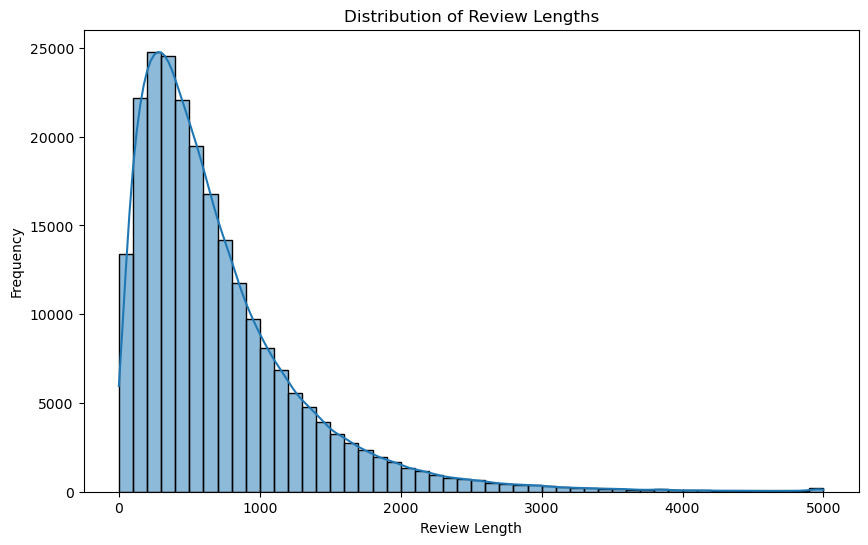

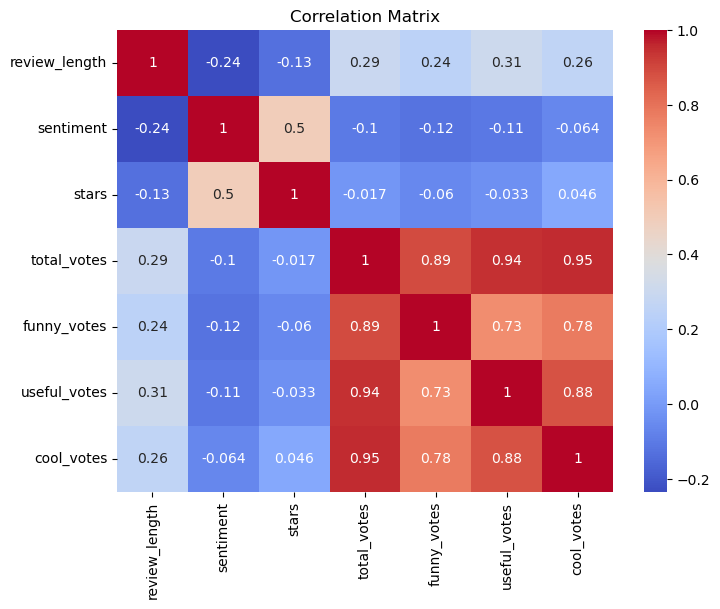

In [33]:
# Distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(review_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Correlation between review length, sentiment, stars, and total votes
correlation_data = review_df[['review_length', 'sentiment', 'stars', 'total_votes','funny_votes','useful_votes','cool_votes']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Sort the reviews by total votes in descending order
top_reviews = review_df.sort_values(by='total_votes', ascending=False).head(100)

# Calculate the percentage of each vote type
top_reviews['funny_percentage'] = (top_reviews['funny_votes'] / top_reviews['total_votes']) * 100
top_reviews['useful_percentage'] = (top_reviews['useful_votes'] / top_reviews['total_votes']) * 100
top_reviews['cool_percentage'] = (top_reviews['cool_votes'] / top_reviews['total_votes']) * 100

# Display the results
median_funny = top_reviews['funny_percentage'].median()
median_useful = top_reviews['useful_percentage'].median()
median_cool = top_reviews['cool_percentage'].median()

# Display the results
print(f"Median Funny Vote Percentage: {median_funny}%")
print(f"Median Useful Vote Percentage: {median_useful}%")
print(f"Median Cool Vote Percentage: {median_cool}%")


Median Funny Vote Percentage: 35.98273691782053%
Median Useful Vote Percentage: 33.161512027491405%
Median Cool Vote Percentage: 31.385927505330493%
